# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt  
import seaborn as sbn
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
linestyles = ['-','--','-.',':']

from HANCModel import HANCModelClass

C:\Users\wrc938\AppData\Local\Temp\ipykernel_17372\3202124864.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
c:\Users\wrc938\OneDrive - University of Copenhagen\CEBI\Global HA\Global HA updated\GlobalHA\HANC\blocks.py:21: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


**Settings:**

In [2]:
SKIP_NN = True
LOAD_RBF = False
LOAD_OLS = False
LOAD_NN = False
Twindow = 1_000

# Perfect foresight

In [3]:
model = HANCModelClass(name='perfect_foresight')

In [4]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

## Solve

In [5]:
model.find_ss(do_print=True,K_min=4.0,K_max=12.0)

K =   4.00000000 -> A_hh-A =  63.48434887
K =  12.00000000 -> A_hh-A = -10.36321488
search for K
  0: K =  10.87733982 -> A_hh-A =  -8.93092587
  1: K =   7.43866991 -> A_hh-A =  -1.81853451
  2: K =   6.65607569 -> A_hh-A =   3.94888501
  3: K =   7.19190884 -> A_hh-A =  -0.61095524
  4: K =   7.08379153 -> A_hh-A =   0.03458388
  5: K =   7.08958377 -> A_hh-A =  -0.00229815
  6: K =   7.08922285 -> A_hh-A =  -0.00000818
  7: K =   7.08922156 -> A_hh-A =   0.00000000
  8: K =   7.08922156 -> A_hh-A =  -0.00000000

K =   7.08922156

Implied K =  7.089
Implied Y =  0.990
Implied Z =  0.524
Implied u =  0.990
Implied r = -0.004
Implied w =  0.663
Implied K/Y =  7.161
Discrepancy in A-A_hh =   0.000000000020
Discrepancy in C-C_hh =   0.000000000068


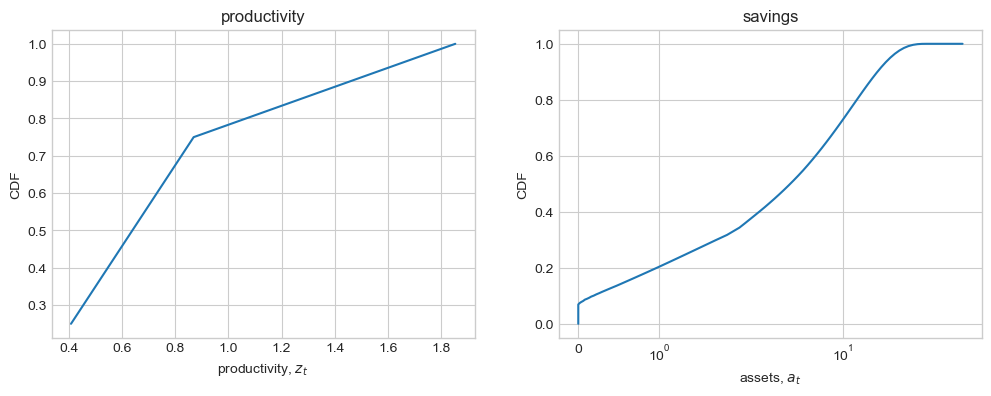

In [6]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D[0],axis=1))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D[0],axis=0)),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')


In [7]:
model.test_path()

shocks: Z 
unknowns: K q 

blocks.block_pre
 L                0.0e+00
 u                0.0e+00
 rk               0.0e+00
 r                0.0e+00
 w                0.0e+00
 Y                0.0e+00
 C                0.0e+00
 A                0.0e+00
 inv              1.1e-16
 foc_inv_term         nan
 foc_inv          1.1e-17 [target]
hh
 A_hh             3.2e-09
 C_hh             5.6e-11
 V_A_hh           8.2e-10
blocks.block_post
 clearing_A       3.2e-09 [target]
 clearing_C           nan


In [8]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for r               in 0.1 secs
curly_Y and curly_D calculated for w               in 0.1 secs
curly_E calculated in 1.4 secs
builiding blocks combined in 0.0 secs
household Jacobian computed in 1.6 secs

full Jacobians:
full Jacobian to unknowns computed in 0.3 secs [in evaluate_blocks(): 0.2 secs]
full Jacobian to shocks computed in 0.1 secs [in evaluate_blocks(): 0.1 secs]


In [9]:
par.jump_Z = 0.02*ss.Z
par.std_Z = 0.01*ss.Z

In [10]:
model.find_transition_path(['Z'], do_print=True,do_end_check=False) # check end problem later

finding the transition path:
 it =   0 -> max. abs. error = 1.38e-01
   1.38e-01 in clearing_A
   1.10e-17 in foc_inv
 it =   1 -> max. abs. error = 7.55e-03
   7.55e-03 in clearing_A
   7.61e-05 in foc_inv
 it =   2 -> max. abs. error = 1.82e-04
   1.82e-04 in clearing_A
   1.46e-05 in foc_inv
 it =   3 -> max. abs. error = 3.08e-05
   3.08e-05 in clearing_A
   1.68e-06 in foc_inv
 it =   4 -> max. abs. error = 5.74e-06
   5.74e-06 in clearing_A
   3.27e-07 in foc_inv
 it =   5 -> max. abs. error = 7.43e-09
   7.43e-09 in clearing_A
   7.55e-10 in foc_inv
 it =   6 -> max. abs. error = 1.59e-10
   1.59e-10 in clearing_A
   1.26e-11 in foc_inv
 it =   7 -> max. abs. error = 1.22e-12
   1.22e-12 in clearing_A
   2.18e-13 in foc_inv
 it =   8 -> max. abs. error = 6.04e-14
   6.04e-14 in clearing_A
   4.74e-15 in foc_inv

transition path found in 1.3 secs


## IRFs

linear transition path found in 0.1 secs [finding solution matrix: 0.1 secs]
### shocks ###


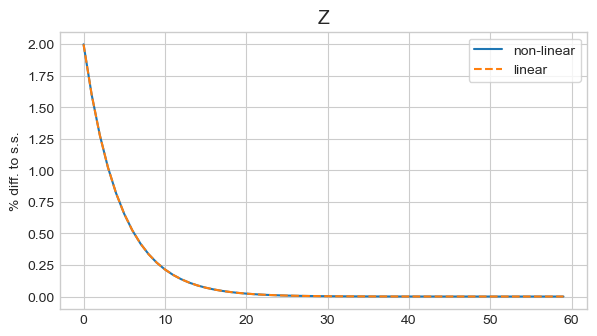


### varnames ###


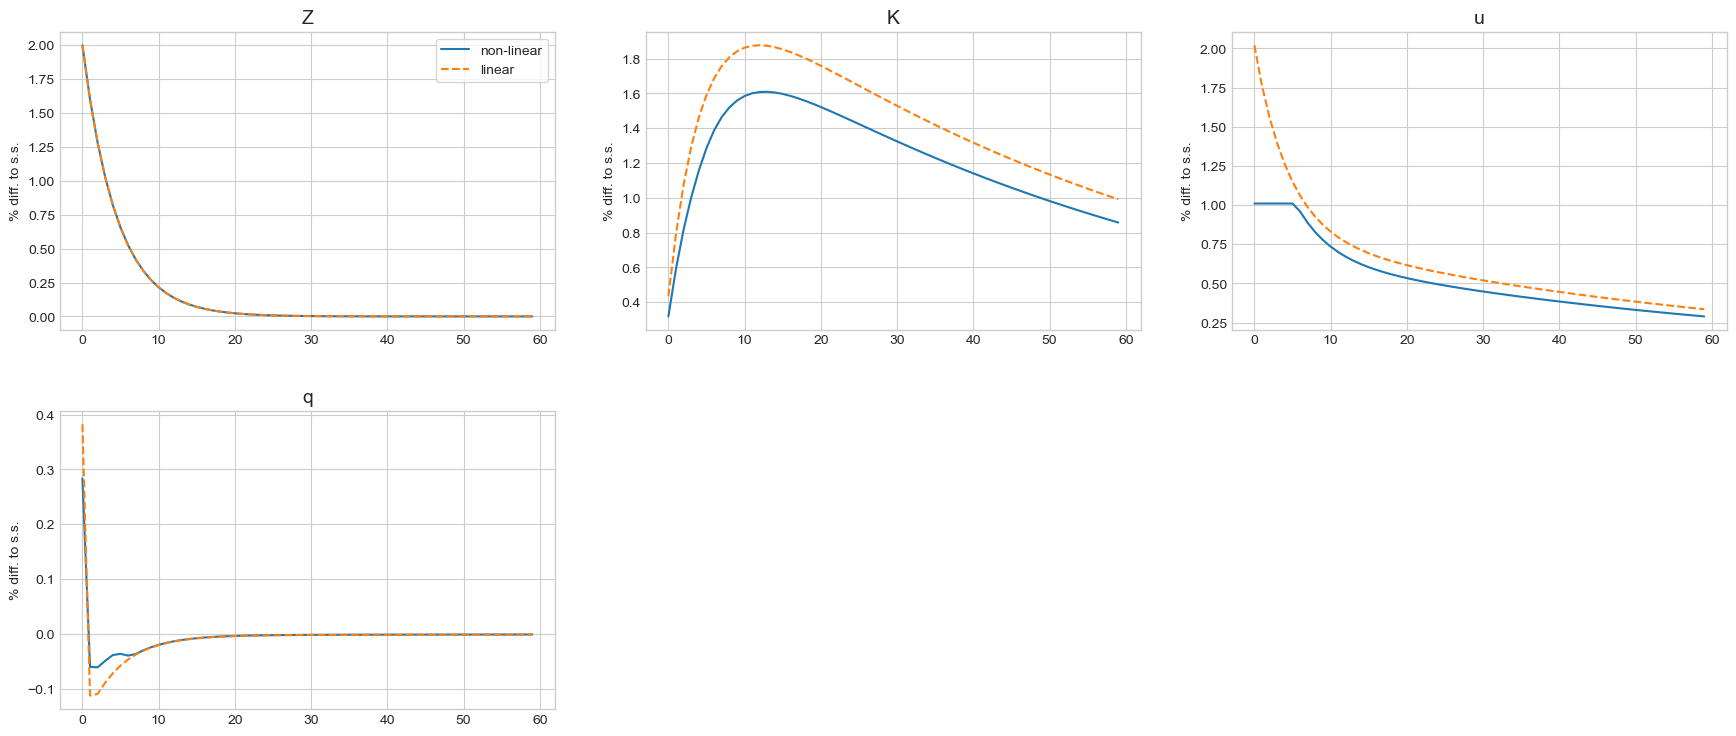


### tagets ###


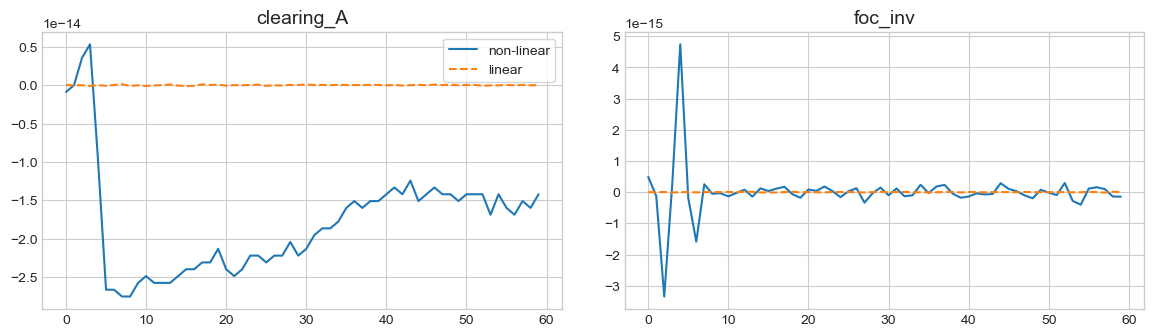

In [11]:
model.find_IRFs(['Z'], do_print=True)
paths = ['Z','K','u','q']
model.show_IRFs(paths,ncols=3,T_max=60,do_linear=True)

## Simulation

In [12]:
np.random.seed(1917)
model.simulate(only_pols_hh=False,do_print=True)

simulation prepared in 0.8 secs [solution matrix: 0.0 secs, households: 0.8 secs]
aggregates simulated in 0.3 secs
household policies simulated in 1.6 secs
distribution simulated in 0.9 secs
aggregates calculated from distribution in 0.0 secs


### Z ###


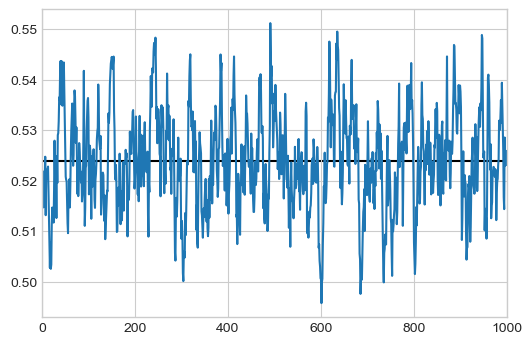

### K ###


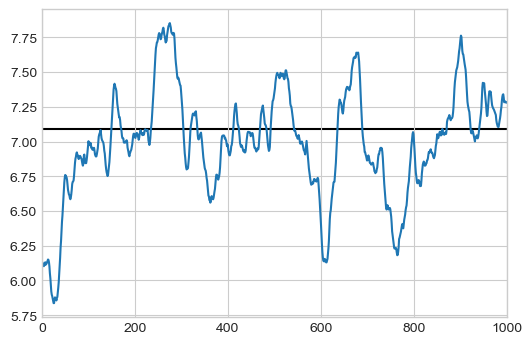

### u ###


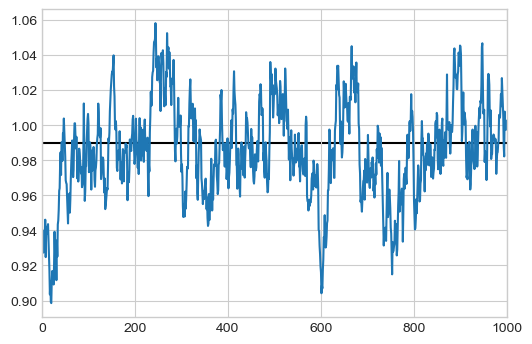

### inv ###


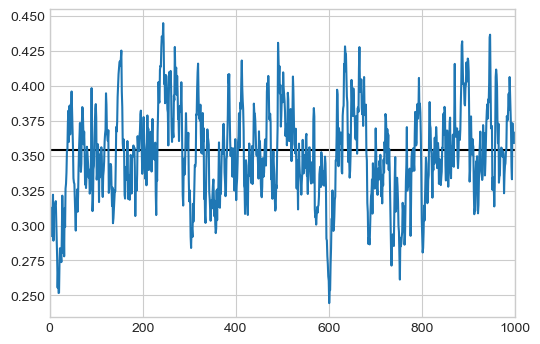

In [13]:
for varname in ['Z','K','u','inv']:
        
    print(f'### {varname} ###')
    
    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(ss.__dict__[varname]+sim.__dict__[f'd{varname}'][-Twindow:])
    ax.axhline(ss.__dict__[varname],color='black',zorder=0)
    ax.set_xlim([0,Twindow])
    plt.show()
    

## Out-of-sample

In [14]:
model_alt = model.copy()
model_alt.dpols = model.dpols
model_alt.simulate(do_print=True)

simulation prepared in 0.1 secs [solution matrix: 0.1 secs, households: 0.1 secs]
aggregates simulated in 0.0 secs
household policies simulated in 1.0 secs
distribution simulated in 0.9 secs
aggregates calculated from distribution in 0.0 secs


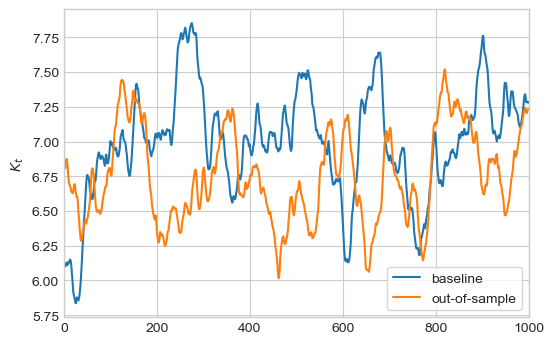

In [15]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(ss.K+sim.dK[-Twindow:],label='baseline')
ax.plot(ss.K+model_alt.sim.dK[-Twindow:],label='out-of-sample')
ax.set_ylabel(f'$K_t$')
ax.legend(frameon=True)
ax.set_xlim([0,Twindow]);

# Global solution

In [16]:
def solve(model,load,do_print=True):
    
    if load:
        model.load_global(do_print=do_print)
        model.solve_global(do_print=do_print,initial_PLM=False,do_timings=False)
    else:
        model.solve_global(do_print=do_print)
        model.save_global(do_print=do_print)        
        

## RBF

In [17]:
model_RBF = model.copy(name='RBF')
model_RBF.setup_global(PLM_method='RBF')
model_RBF.set_inital_values(do_print=True)

initial values found in 5.5 secs


In [18]:
solve(model_RBF,LOAD_RBF)

PLM estimated with RBF in 0.9 secs
mse evaluated calculated in 0.4 secs
 mse_K = 3.52e-27
 mse_q = 1.57e-27

iteration =    0
it =    0: max_abs_diff =   0.44734131 [in 9.5 secs, in 6.1 secs]
it =    1: max_abs_diff =   0.02788883 [in 0.1 secs, in 0.1 secs]
it =    2: max_abs_diff =   0.01426529 [in 0.4 secs, in 0.4 secs]
it =    3: max_abs_diff =   0.00956906 [in 0.1 secs, in 0.1 secs]
it =    4: max_abs_diff =   0.00701563 [in 0.4 secs, in 0.3 secs]
it =    5: max_abs_diff =   0.00542623 [in 0.2 secs, in 0.2 secs]
it =    6: max_abs_diff =   0.00444343 [in 0.3 secs, in 0.2 secs]
it =    7: max_abs_diff =   0.00369522 [in 0.2 secs, in 0.2 secs]
it =    8: max_abs_diff =   0.00310767 [in 0.3 secs, in 0.2 secs]
it =    9: max_abs_diff =   0.00270792 [in 0.2 secs, in 0.2 secs]


Traceback (most recent call last):
  File "c:\Users\wrc938\OneDrive - University of Copenhagen\CEBI\Global HA\Global HA updated\GlobalHA\HANC\solve_global.py", line 104, in solve_hh_global
    solve_hh_global_backwards_egm(par,KS.PLM_q,marg_u_plus,KS.v_a,KS.a,KS.c,KS.m)
KeyboardInterrupt


KeyboardInterrupt: 

## OLS

In [ ]:
model_OLS = model.copy(name='OLS')
model_OLS.setup_global(PLM_method='OLS')
model_OLS.set_inital_values(do_print=True)

initial values found in 9.6 secs


In [ ]:
solve(model_OLS,LOAD_OLS)

PLM estimated with OLS in 0.0 secs

iteration =    0
it =    0: max_abs_diff =   0.44396587 [in 16.4 secs, in 10.7 secs]
it =    1: max_abs_diff =   0.02788459 [in 0.5 secs, in 0.2 secs]
it =    2: max_abs_diff =   0.01405444 [in 0.5 secs, in 0.2 secs]
it =    3: max_abs_diff =   0.00941250 [in 0.5 secs, in 0.2 secs]
it =    4: max_abs_diff =   0.00687044 [in 0.5 secs, in 0.2 secs]
it =    5: max_abs_diff =   0.00535500 [in 0.5 secs, in 0.3 secs]
it =    6: max_abs_diff =   0.00436357 [in 0.5 secs, in 0.2 secs]
it =    7: max_abs_diff =   0.00361230 [in 0.5 secs, in 0.2 secs]
it =    8: max_abs_diff =   0.00304264 [in 0.6 secs, in 0.2 secs]
it =    9: max_abs_diff =   0.00264652 [in 0.5 secs, in 0.2 secs]
it =  100: max_abs_diff =   0.00006420 [in 0.5 secs, in 0.2 secs]
it =  200: max_abs_diff =   0.00001575 [in 0.6 secs, in 0.2 secs]
household problem solved in 2.0 mins 12 secs [224 iterations]
model simulated in 23.6 secs
extrapolation: Pr[Z < Z_grid[0]] = 0.00, Pr[Z > Z_grid[-1]] = 

## Neural net

In [ ]:
if not SKIP_NN:
    model_NN = model.copy(name='NN')
    model_NN.setup_global(PLM_method='NN')
    model_NN.set_inital_values(do_print=True)

In [ ]:
if not SKIP_NN:
    solve(model_NN,LOAD_NN)

# Simulation

In [ ]:
models = [model_OLS,model_RBF]

if not SKIP_NN:
    models.append(model_NN)

In [ ]:
for model_ in models:    
    print(model_.name)
    model_.sim.Z[:] = model.ss.Z + model.sim.dZ
    model_.simulate_global(do_print=True)                    
    print('')

OLS
model simulated in 19.5 secs

RBF
model simulated in 26.4 secs



In [ ]:
def plot_sim_compare_linear(model,varname,figname=None,Twindow=1000):
    
    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)

    ax.plot(np.arange(Twindow),ss.__dict__[varname]+sim.__dict__[f'd{varname}'][-Twindow:],
            color='black',lw=2,alpha=0.20,label=f'linear')
    ax.plot(np.arange(Twindow),model.sim.__dict__[varname][-Twindow:],lw=2,ls='--',label=model.name)
    
    ax.set_ylabel(f'${varname}_t$')
    ax.legend(frameon=True)
    ax.set_xlim([0,Twindow])
    fig.tight_layout() 
    
    if not figname is None: fig.savefig(f'figs/{figname}_{varname}.pdf')

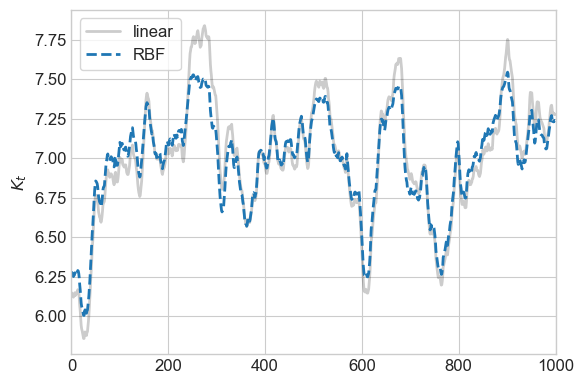

In [ ]:
plot_sim_compare_linear(model_RBF,varname='K',figname='sim_compare_linear_RBF')

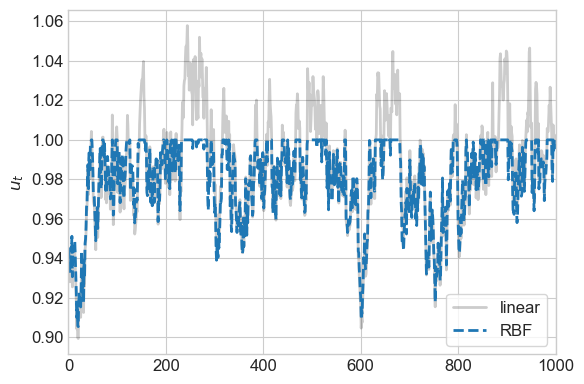

In [ ]:
plot_sim_compare_linear(model_RBF,varname='u',figname='sim_compare_linear_RBF')

In [ ]:
def plot_sim_compare(models,varname,figname=None,Twindow=1000):
    
    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)
    
    for i,model_ in enumerate(models):
        ax.plot(np.arange(Twindow),model_.sim.__dict__[varname][-Twindow:],
                label=f'{model_.name}',ls=linestyles[i],lw=2)

    ax.set_ylabel(f'${varname}_t$')
    ax.legend(frameon=True)
    ax.set_xlim([0,Twindow])
    plt.tight_layout()
    
    if not figname is None: fig.savefig(f'figs/{figname}_{varname}.pdf')    

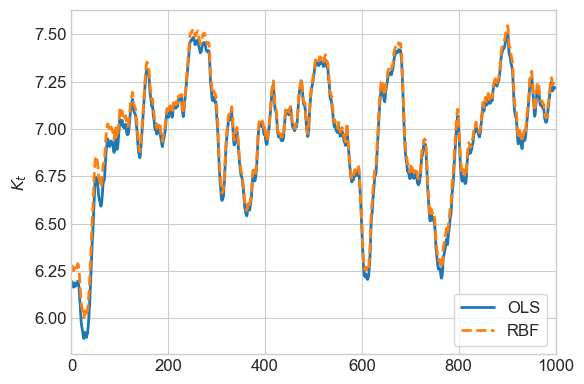

In [ ]:
plot_sim_compare(models,varname='K',figname='sim_compare')

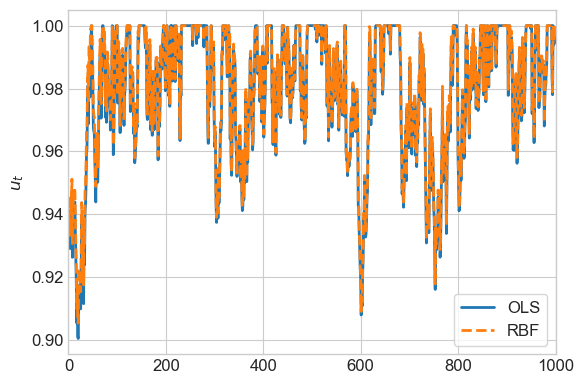

In [ ]:
plot_sim_compare(models,varname='u',figname='sim_compare')

# Out-of-sample simulation

In [ ]:
for model_ in models:    
    print(model_.name)
    model_.sim.Z[:] = model_alt.ss.Z + model_alt.sim.dZ
    model_.simulate_global(do_print=True)                    
    print('')

OLS
model simulated in 18.2 secs

RBF
model simulated in 24.9 secs



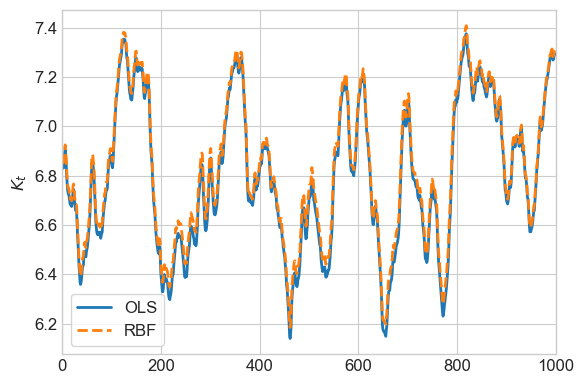

In [ ]:
plot_sim_compare(models,varname='K',figname='sim_compare_out_of_sample')

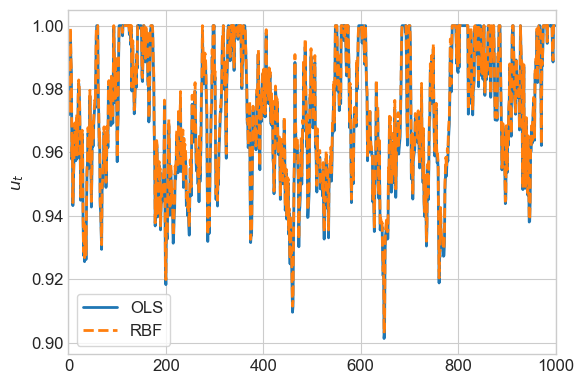

In [ ]:
plot_sim_compare(models,varname='u',figname='sim_compare_out_of_sample')

# Prediction errors

In [ ]:
for model_ in models:
    print(model_.name)
    model_.compute_errors(do_print=True)
    print('')

OLS
max abs.:      3.75
mean abs.:     0.88
median abs.:   0.79
99 perc. abs.: 3.16
90 perc. abs.: 1.62
R2:            0.9389
errors computed in 0.1 secs

RBF
max abs.:      0.26
mean abs.:     0.04
median abs.:   0.03
99 perc. abs.: 0.18
90 perc. abs.: 0.07
R2:            0.9999
errors computed in 2.1 secs



In [ ]:
if SKIP_NN:
    models_tab = [model_OLS,model_RBF,None]
else:
    models_tab = [model_OLS,model_RBF,model_NN]

# a. errors
with open(r'tabs\errors.tex', 'w') as f:
    for row in ['max','mean','median','99th perc.','90th perc.']:
        line = f' {row} &'
        for model_ in models_tab: 
            if model_ is None: 
                line += ' &'
            else:
                den_haan = model_.errors['den_haan']
                if row == 'max':
                    value = f' {den_haan.max():.2f}'
                elif row == 'mean':
                    value = f' {den_haan.mean():.2f}'
                elif row == 'median':
                    value = f' {np.percentile(den_haan,50):.2f}'
                elif row == '99th perc.':
                    value = f' {np.percentile(den_haan,99):.2f}'  
                elif row == '90th perc.':
                    value = f' {np.percentile(den_haan,90):.2f}'                      
                else:
                    raise NotImplementedError
                line += value + ' &'
        line = line[:-1] + '\\\\'    
        f.write(line + '\n')

# b. timings        
with open(r'tabs\timings.tex', 'w') as f:
    for row,key in [('total','total'),
                    (' - solve household problem','solve'),
                    (' - simulate  with market clearing','simulate'),
                    (' - estimate PLMs','PLM'),
                    (None,None),
                    ('iterations','it')]:
        if row is None:
            f.write('\\\\\n')
            continue
        line = f' {row} &'
        for model_ in models_tab: 
            if model_ is None: 
                line += ' &'
            else:
                if key == 'it':
                    value = f' {model_.timings[key]}' 
                else:
                    if type(model_.timings[key]) is set:
                        model_.timings[key] = list(model_.timings[key])[0]
                    value = f' {model_.timings[key]:.1f}'             
                line += value + ' &'
        line = line[:-1] + '\\\\'    
        f.write(line + '\n')

## Time-path

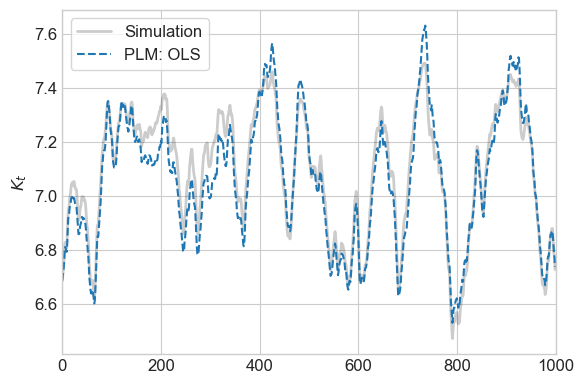

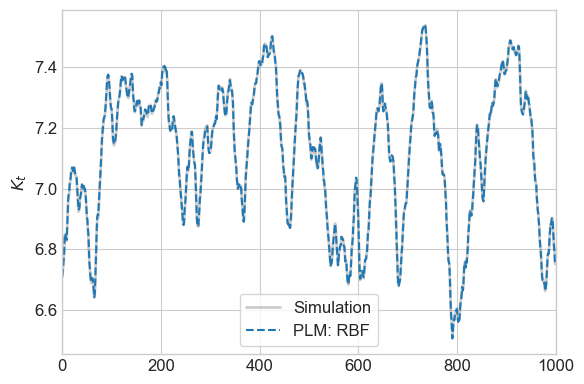

In [ ]:
Twindow = 1000
for model_ in models:
    
    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)

    ax.plot(np.arange(Twindow),model_.errors['K'][:Twindow],label=f'Simulation',
            color='black',lw=2,alpha=0.2)

    ax.plot(np.arange(Twindow),model_.errors['K_PLM'][:Twindow],
            label=f'PLM: {model_.name}',ls='--')

    ax.set_ylabel(f'$K_t$')
    ax.legend(frameon=True)
    ax.set_xlim([0,Twindow])
    fig.tight_layout()
    fig.savefig(f'figs/den_haan_errors_time_path_{model_.name}.pdf')

## One-step pdf

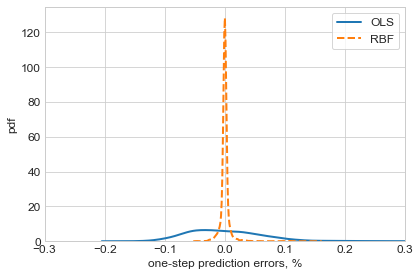

In [ ]:
bound = 0.3
for i,model_ in enumerate(models):
    sbn.kdeplot(model_.errors['one_step_K'],bw_method=0.2,
                clip=(-bound,bound),ls=linestyles[i],lw=2,label=model_.name)
    
plt.xlim([-bound,bound])
plt.xlabel('one-step prediction errors, %')
plt.ylabel('pdf')
plt.legend(frameon=True)
plt.tight_layout()    

plt.savefig('figs/one_step_K_errors_pdf.pdf')

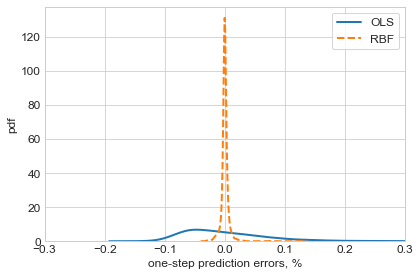

In [ ]:
bound = 0.3
for i,model_ in enumerate(models):
    sbn.kdeplot(model_.errors['one_step_q'],bw_method=0.2,
                clip=(-bound,bound),ls=linestyles[i],lw=2,label=model_.name)
    
plt.xlim([-bound,bound])
plt.xlabel('one-step prediction errors, %')
plt.ylabel('pdf')
plt.legend(frameon=True)
plt.tight_layout()    

plt.savefig('figs/one_step_q_errors_pdf.pdf')

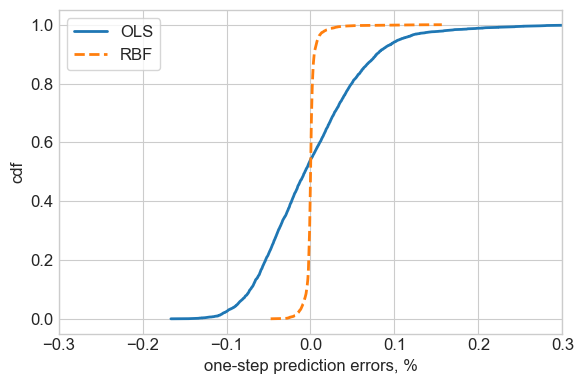

In [ ]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

for i,model_ in enumerate(models):
    y = np.linspace(0,1,model_.errors['one_step_K'].size)
    x = np.sort(model_.errors['one_step_K'])
    ax.plot(x,y,ls=linestyles[i],lw=2,label=model_.name)
    
ax.set_xlim([-bound,bound])
ax.set_ylabel('cdf')
ax.set_xlabel('one-step prediction errors, %');
ax.legend(frameon=True)

plt.tight_layout()    
plt.savefig('figs/one_step_K_errors_cdf.pdf');

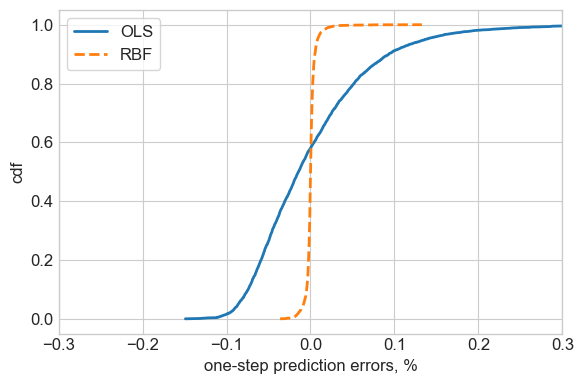

In [ ]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

for i,model_ in enumerate(models):
    y = np.linspace(0,1,model_.errors['one_step_q'].size)
    x = np.sort(model_.errors['one_step_q'])
    ax.plot(x,y,ls=linestyles[i],lw=2,label=model_.name)
    
ax.set_xlim([-bound,bound])
ax.set_ylabel('cdf')
ax.set_xlabel('one-step prediction errors, %');
ax.legend(frameon=True)

plt.tight_layout()    
plt.savefig('figs/one_step_q_errors_cdf.pdf');

# Impulse responses

In [ ]:
for model_ in models:    
    print(model_.name)
    model_.sim.Z[:] = model_alt.ss.Z + model_alt.sim.dZ
    model_.simulate_global(do_print=True)                    
    print('')

OLS
model simulated in 17.9 secs

RBF
model simulated in 25.1 secs



### OLS ###
hey
IRFs computed from 555 starting points in 2.0 mins 2 secs
Z


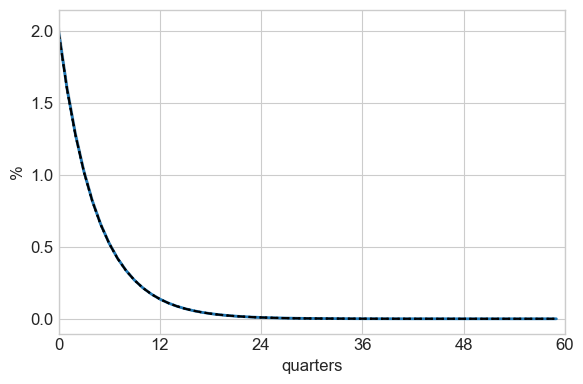

K


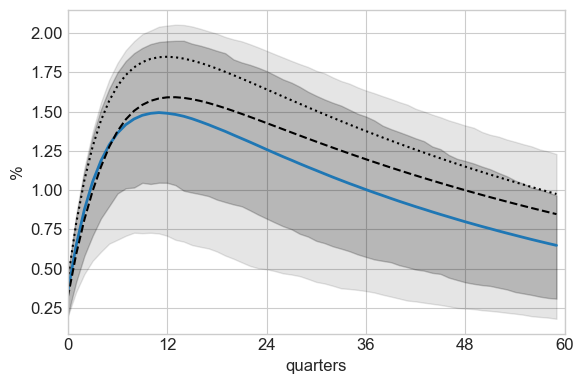

u


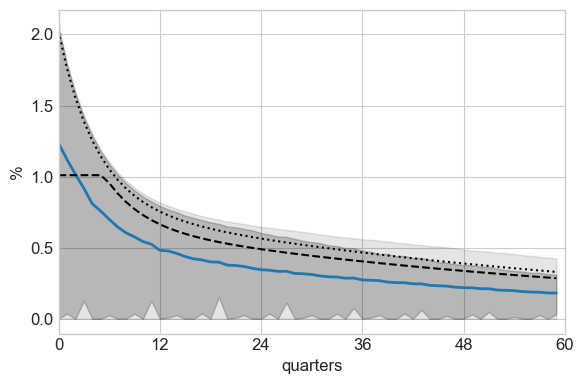

### RBF ###
hey
IRFs computed from 555 starting points in 2.0 mins 35 secs
Z


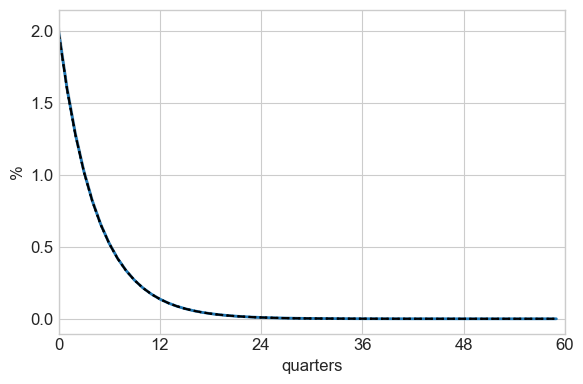

K


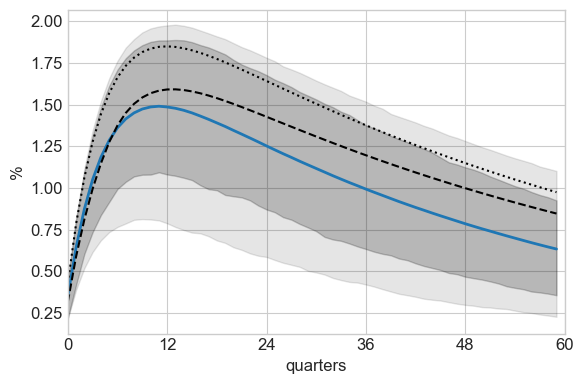

u


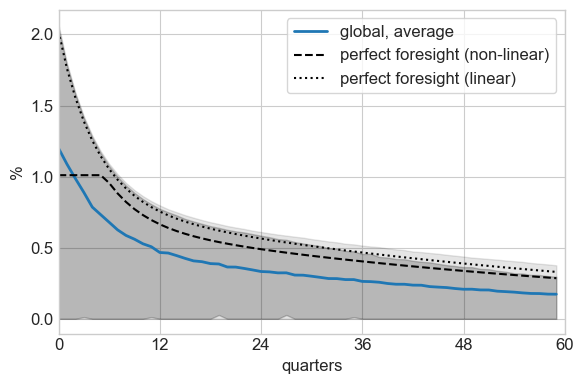

In [ ]:
for model_ in models:
        
    print(f'### {model_.name} ###')
    
    model_.find_global_IRFs(do_print=True)
    
    for varname in ['Z','K','u']:
        
        print(varname)
        
        fig = plt.figure(figsize=(6,4),dpi=100)
        ax = fig.add_subplot(1,1,1)

        IRF = model_.global_IRFs[varname]
        
        ax.fill_between(np.arange(par.IRFT),np.percentile(IRF,10,axis=0),
                        np.percentile(IRF,90,axis=0),
                        color='black',alpha=0.10)
        
        ax.fill_between(np.arange(par.IRFT),np.percentile(IRF,25,axis=0),
                        np.percentile(IRF,75,axis=0),
                        color='black',alpha=0.20)        
        
        ax.plot(np.arange(par.IRFT),np.mean(IRF,axis=0),lw=2,label='global, average')
    
        ax.plot((path.__dict__[varname][0,:par.IRFT]/ss.__dict__[varname]-1)*100,
                color='black',ls='--',label='perfect foresight (non-linear)')
        ax.plot((model.IRF[varname][:par.IRFT]/ss.__dict__[varname])*100,
                color='black',ls=':',label='perfect foresight (linear)')
                
        ax.set_xlim([0,par.IRFT])
        ax.set_ylabel(f'%')
        ax.set_xticks(np.arange(0,par.IRFT+1,12))   
        ax.set_xlabel('quarters')
        if model_.name == 'RBF' and varname == 'u': ax.legend(frameon=True)
        
        fig.tight_layout()
        fig.savefig(f'figs/IRF_{varname}_{model_.name}_global.pdf')
        
        plt.show()

Z


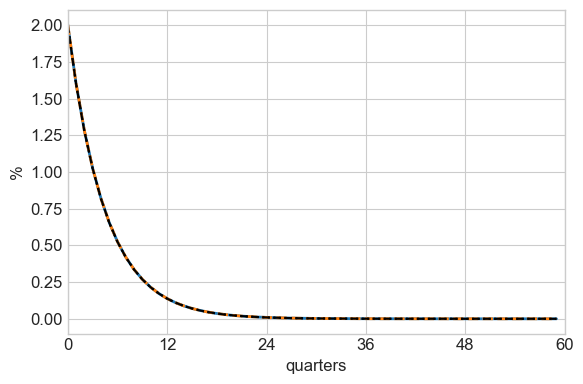

K


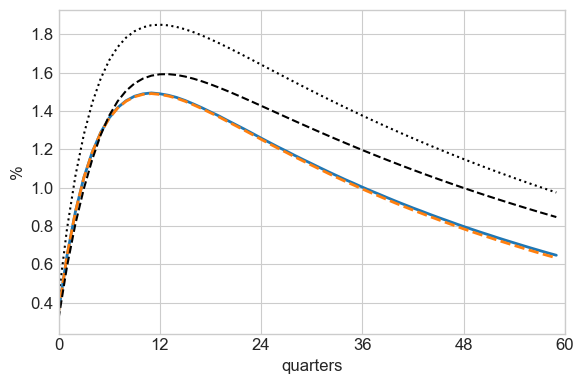

u


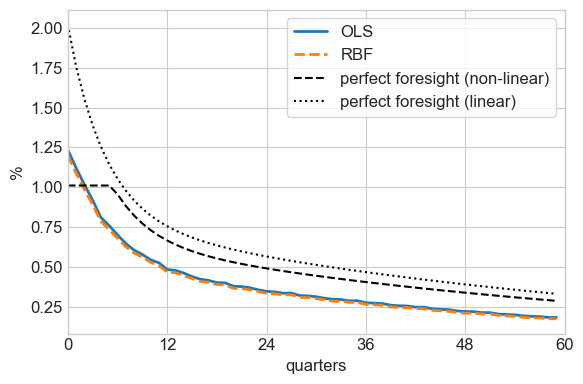

In [ ]:
for varname in ['Z','K','u']:
        
    print(varname)
        
    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)
        
    for i,model_ in enumerate(models):

        IRF = model_.global_IRFs[varname]
        ax.plot(np.arange(par.IRFT),np.mean(IRF,axis=0),
                label=f'{model_.name}',ls=linestyles[i],lw=2)

    ax.plot((path.__dict__[varname][0,:par.IRFT]/ss.__dict__[varname]-1)*100,
            color='black',ls='--',label='perfect foresight (non-linear)')
    ax.plot((model.IRF[varname][:par.IRFT]/ss.__dict__[varname])*100,
            color='black',ls=':',label='perfect foresight (linear)')

    ax.set_xlim([0,par.IRFT])
    ax.set_ylabel(f'%')
    ax.set_xticks(np.arange(0,par.IRFT+1,12))    
    if varname == 'u': ax.legend(frameon=True)
    ax.set_xlabel('quarters')
        
    fig.tight_layout()
    fig.savefig(f'figs/IRF_{varname}_global.pdf')
    plt.show()
    

# PLM plots

In [ ]:
def find_nearest(grid, value):
    ''' find nearest grid index where grid is closest to input value'''
    idx = (np.abs(grid - value)).argmin()
    return idx  

# indeces for steady-state values of PLM state variables
i_Z_fix = find_nearest(model_RBF.par.Z_grid,model_RBF.ss.Z)
i_K_fix = find_nearest(model_RBF.par.K_grid,model_RBF.ss.K)
i_inv_fix = find_nearest(model_RBF.par.inv_grid,model_RBF.ss.inv)

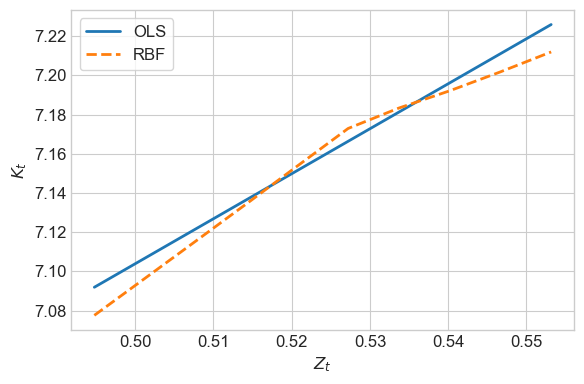

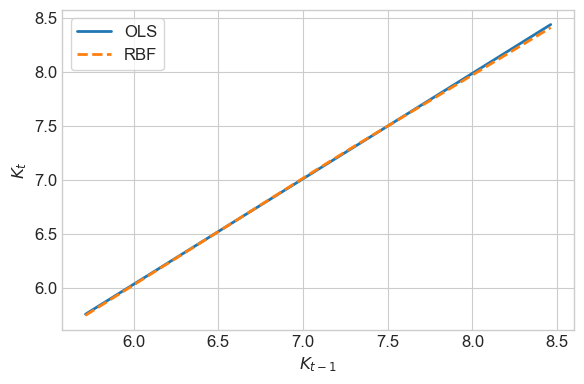

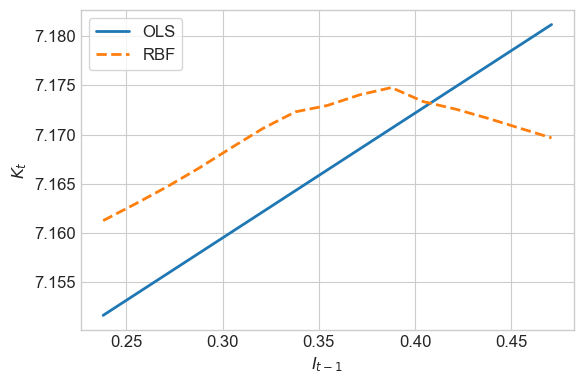

In [ ]:
# a. vary Z
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
for i,model_ in enumerate(models):
    PLM_K = model_.KS.PLM_K.copy()
    ax.plot(model_.par.Z_grid,PLM_K[:,i_K_fix,i_inv_fix],label=f'{model_.name}',ls=linestyles[i],lw=2) # vary Z
    ax.set_ylabel('$K_t$')
    ax.set_xlabel('$Z_t$')
    ax.legend(frameon=True)
    
fig.tight_layout()
fig.savefig('figs/PLM_K_vary_Z.pdf')
plt.show()

# b. vary K
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
for i,model_ in enumerate(models):
    PLM_K = model_.KS.PLM_K.copy()
    ax.plot(model_.par.K_grid,PLM_K[i_Z_fix,:,i_inv_fix],label=f'{model_.name}',ls=linestyles[i],lw=2) # vary K
    ax.set_ylabel('$K_t$')
    ax.set_xlabel('$K_{t-1}$')
    ax.legend(frameon=True)
    
fig.tight_layout()
fig.savefig('figs/PLM_K_vary_K.pdf')
plt.show()

# c. vary K
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
for i,model_ in enumerate(models):
    PLM_K = model_.KS.PLM_K.copy()
    ax.plot(model_.par.inv_grid,PLM_K[i_Z_fix,i_K_fix,:],label=f'{model_.name}',ls=linestyles[i],lw=2) # vary inv
    ax.set_ylabel('$K_t$')
    ax.set_xlabel('$I_{t-1}$')
    ax.legend(frameon=True)
    
fig.tight_layout()
fig.savefig('figs/PLM_K_vary_I.pdf')
plt.show()
    

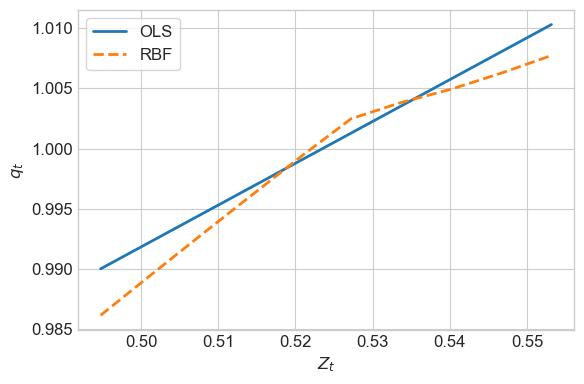

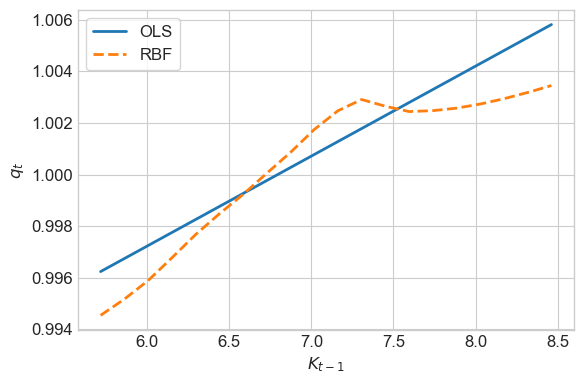

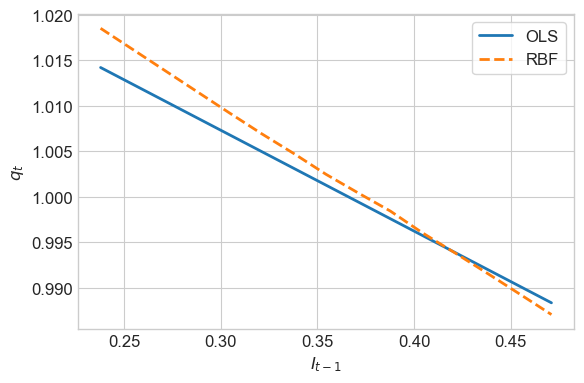

In [ ]:
# a. vary Z
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
for i,model_ in enumerate(models):
    PLM_q = model_.KS.PLM_q.copy()
    ax.plot(model_.par.Z_grid,PLM_q[:,i_K_fix,i_inv_fix],label=f'{model_.name}',ls=linestyles[i],lw=2) # vary Z
    ax.set_ylabel('$q_t$')
    ax.set_xlabel('$Z_t$')
    ax.legend(frameon=True)
    
fig.tight_layout()
fig.savefig('figs/PLM_q_vary_Z.pdf')
plt.show()

# b. vary K
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
for i,model_ in enumerate(models):
    PLM_q = model_.KS.PLM_q.copy()
    ax.plot(model_.par.K_grid,PLM_q[i_Z_fix,:,i_inv_fix],label=f'{model_.name}',ls=linestyles[i],lw=2) # vary K
    ax.set_ylabel('$q_t$')
    ax.set_xlabel('$K_{t-1}$')
    ax.legend(frameon=True)
    
fig.tight_layout()
fig.savefig('figs/PLM_q_vary_K.pdf')
plt.show()

# c. vary K
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
for i,model_ in enumerate(models):
    PLM_q = model_.KS.PLM_q.copy()
    ax.plot(model_.par.inv_grid,PLM_q[i_Z_fix,i_K_fix,:],label=f'{model_.name}',ls=linestyles[i],lw=2) # vary inv
    ax.set_ylabel('$q_t$')
    ax.set_xlabel('$I_{t-1}$')
    ax.legend(frameon=True)
    
fig.tight_layout()
fig.savefig('figs/PLM_q_vary_I.pdf')
plt.show()